# Introduction
In this script, I'll try to plot all the different parameters of interest for the battery problem. These parameters are:
* Battery Pack (ID = 'munisense.msup1g30034')
    * Power.BatteryState
    * Power.BatteryVoltHR
    * Power.PercentageRemaining
    * Power.TimeRemaining
* Weather station (ID = 'davis.davis.weather.1')
    * environment.light
    * environment.temperature
    * weather.uv
    * environment.relativehumidity

In [6]:
import pandas as pd
import glob

# Import data from .csv-files

## Weather data

In [7]:
path = r'C:\Users\Jeff\Dropbox\ICT-Elektronica\Thesis\scripts\weather_data'

In [8]:
##### metricsList is used for the strings (names of the tables) #####
weatherMetricsList = ['environment.light','environment.temperature','weather.uv','environment.relativehumidity']

In [27]:
##### tableList is used as a list of the newly generated tables #####
weatherList = ['environment.light','environment.temperature','weather.uv','environment.relativehumidity']
##### This loop merges all the csv-files in new dataframes
for i in range(0,len(weatherMetricsList)): 
    dataList = glob.glob(path+'\\'+weatherMetricsList[i]+'_merged'+'*')
    df =  pd.read_csv(dataList[0],  index_col=[0])
    # Select timestamp and value from results
    weatherList[i] = df[['time','value']]
    # Convert object to float (BatteryVoltHR is an object for example)
    weatherList[i]["value"] = pd.to_numeric(weatherList[i].value, errors='coerce')
    # Rename the column
    weatherList[i].rename(columns={'value':weatherMetricsList[i]}, inplace=True)
    # Set timestamp as index
    weatherList[i] = weatherList[i].set_index(pd.DatetimeIndex(pd.to_datetime(weatherList[i].time, unit='ms')))
    weatherList[i].drop(['time'], axis=1,inplace=True)


C:\Users\Jeff\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:466: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Battery data

In [29]:
path = r'C:\Users\Jeff\Dropbox\ICT-Elektronica\Thesis\scripts\battery_data'

In [30]:
##### metricsList is used for the strings (names of the tables) #####
batteryMetricsList = ['Power.BatteryState','Power.BatteryVoltHR','Power.PercentageRemaining','Power.TimeRemaining']

In [31]:
##### tableList is used as a list of the newly generated tables #####
batteryList = ['Power.BatteryState','Power.BatteryVoltHR','Power.PercentageRemaining','Power.TimeRemaining']
##### This loop merges all the csv-files in new dataframes
for i in range(0,len(batteryMetricsList)): 
    dataList = glob.glob(path+'\\'+batteryMetricsList[i]+'_merged'+'*')
    df =  pd.read_csv(dataList[0],  index_col=[0])
    # Select timestamp and value from results
    batteryList[i] = df[['time','value']]
    # Convert object to float (BatteryVoltHR is an object for example)
    batteryList[i]["value"] = pd.to_numeric(batteryList[i].value, errors='coerce')
    # Rename the column
    batteryList[i].rename(columns={'value':batteryMetricsList[i]}, inplace=True)
    # Set timestamp as index
    batteryList[i] = batteryList[i].set_index(pd.DatetimeIndex(pd.to_datetime(batteryList[i].time, unit='ms')))
    batteryList[i].drop(['time'], axis=1,inplace=True)
#     print(batteryList[i])

# Visualization

In [54]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [33]:
plotly.tools.set_credentials_file(username='jeffgeudens', api_key='fjXUBp4LmaLp1HlNHc6R')
init_notebook_mode(connected=True)

## Weather station

In [ ]:
##### TOO MUCH DATA TO PLOT WITH PLOTLY #####
# metricNumber = 0
# data = [go.Scattergl(
#     x=weatherList[metricNumber].index,
#     y=weatherList[metricNumber][weatherMetricsList[metricNumber]])]

# layout = dict(
#     title = weatherMetricsList[metricNumber]
# )

# fig = dict(data=data, layout=layout)
# py.iplot(fig,filename = weatherMetricsList[metricNumber])

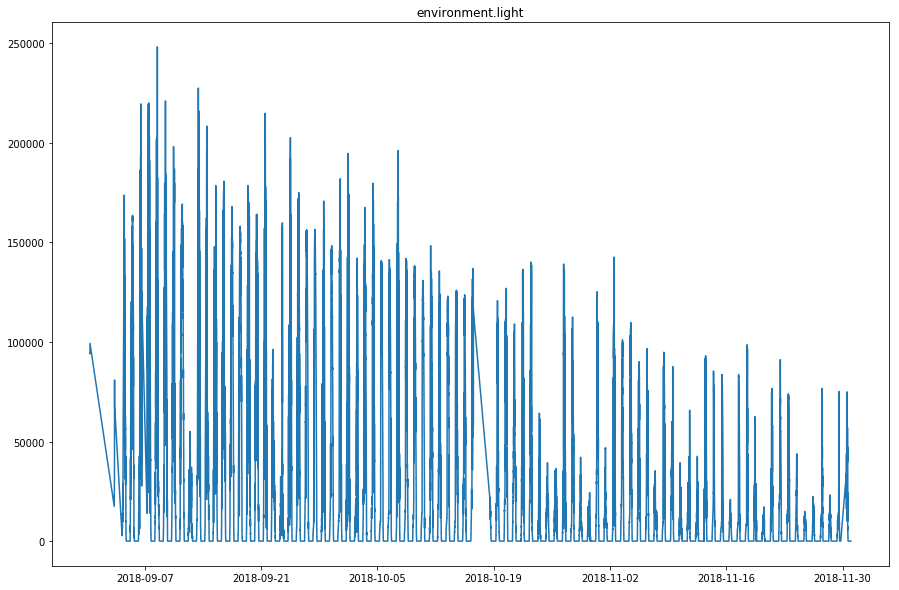

In [36]:
metricNumber = 0
x=weatherList[metricNumber].index
y=weatherList[metricNumber][weatherMetricsList[metricNumber]]

plt.figure(figsize=(15,10))
plt.title(weatherMetricsList[metricNumber])
plt.plot(x,y)
plt.show()

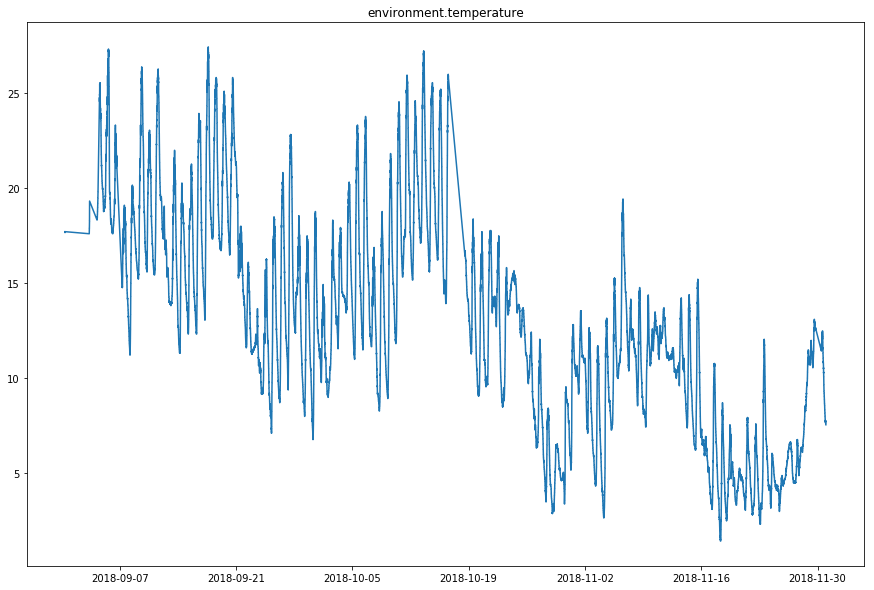

In [45]:
metricNumber = 1
x=weatherList[metricNumber].index
y=weatherList[metricNumber][weatherMetricsList[metricNumber]]

plt.figure(figsize=(15,10))
plt.title(weatherMetricsList[metricNumber])
plt.plot(x,y)
plt.show()

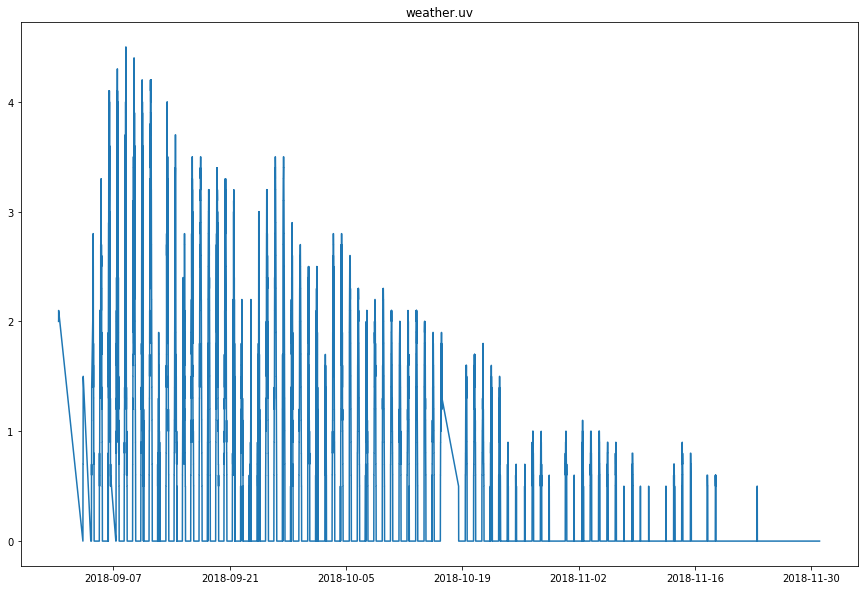

In [46]:
metricNumber = 2
x=weatherList[metricNumber].index
y=weatherList[metricNumber][weatherMetricsList[metricNumber]]

plt.figure(figsize=(15,10))
plt.title(weatherMetricsList[metricNumber])
plt.plot(x,y)
plt.show()

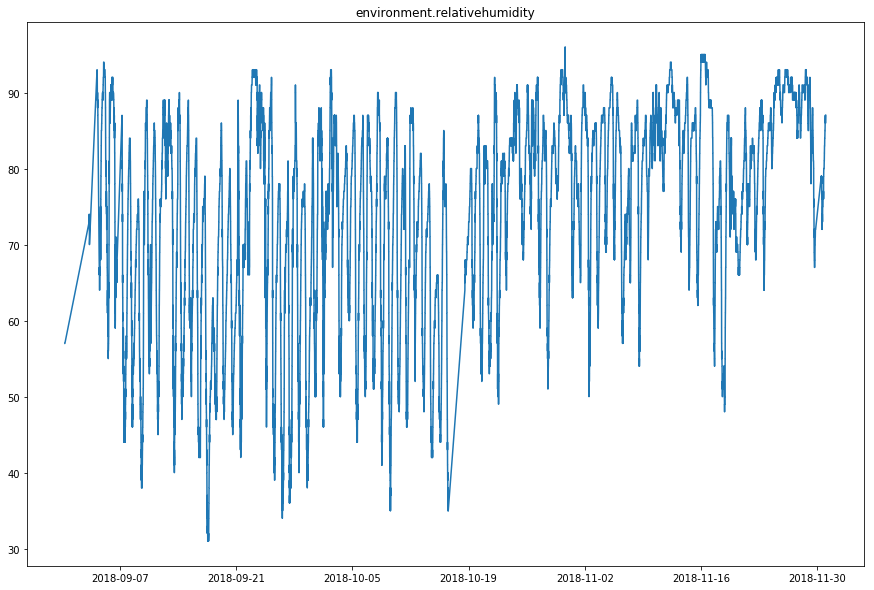

In [47]:
metricNumber = 3
x=weatherList[metricNumber].index
y=weatherList[metricNumber][weatherMetricsList[metricNumber]]

plt.figure(figsize=(15,10))
plt.title(weatherMetricsList[metricNumber])
plt.plot(x,y)
plt.show()

## Battery pack

In [ ]:
metricNumber = 1
data = [go.Scattergl(
    x=batteryList[metricNumber].index,
    y=batteryList[metricNumber][batteryMetricsList[metricNumber]])]

layout = dict(
    title = batteryMetricsList[metricNumber]
)

fig = dict(data=data, layout=layout)
py.iplot(fig,filename = batteryMetricsList[metricNumber])

In [ ]:
metricNumber = 2
data = [go.Scattergl(
    x=batteryList[metricNumber].index,
    y=batteryList[metricNumber][batteryMetricsList[metricNumber]])]

layout = dict(
    title = batteryMetricsList[metricNumber]
)

fig = dict(data=data, layout=layout)
py.iplot(fig,filename = batteryMetricsList[metricNumber])

In [ ]:
metricNumber = 3
data = [go.Scattergl(
    x=batteryList[metricNumber].index,
    y=batteryList[metricNumber][batteryMetricsList[metricNumber]])]

layout = dict(
    title = batteryMetricsList[metricNumber]
)

fig = dict(data=data, layout=layout)
py.iplot(fig,filename = batteryMetricsList[metricNumber])

## Combination

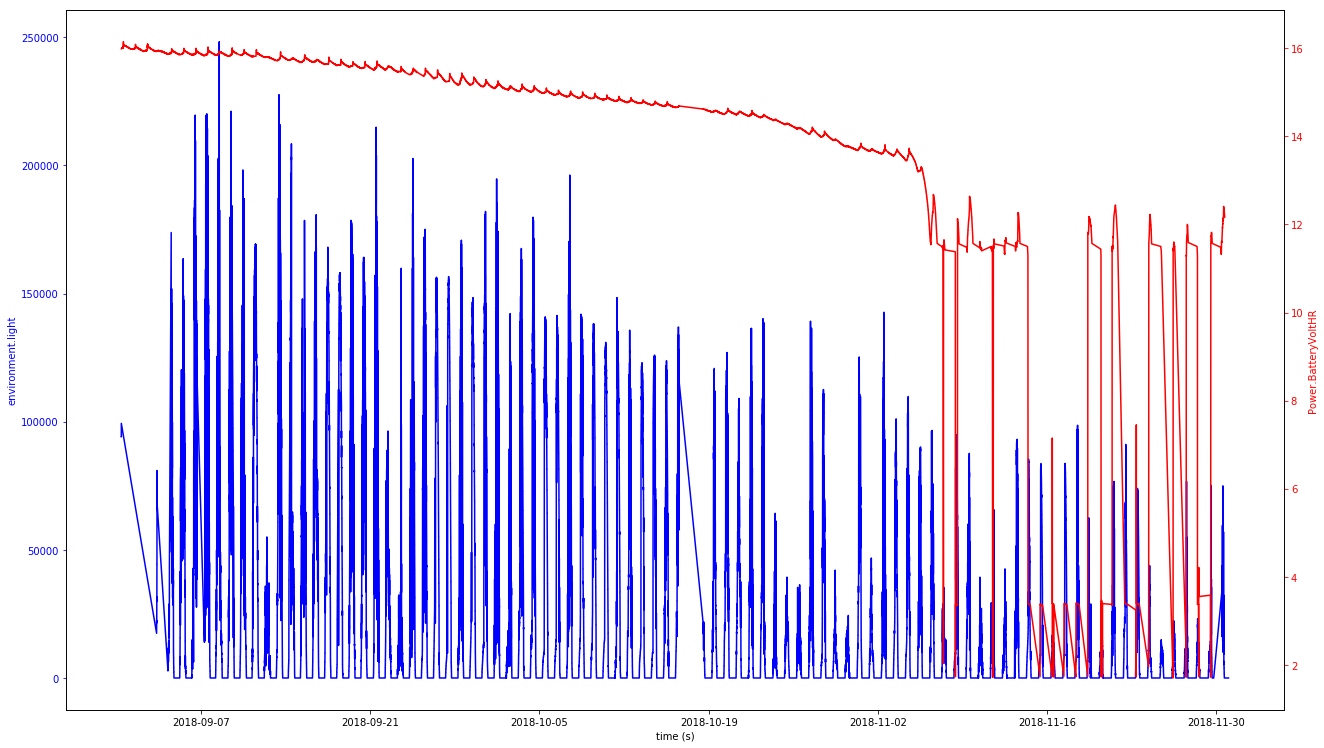

In [56]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(15,10))

x1=weatherList[0].index
y1=weatherList[0][weatherMetricsList[0]]
ax1.plot(x1, y1, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel(weatherMetricsList[0], color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
x2=batteryList[1].index
y2=batteryList[1][batteryMetricsList[1]]
ax2.plot(x2, y2, 'r-')
ax2.set_ylabel(batteryMetricsList[1], color='r')
ax2.tick_params('y', colors='r')

fig.set_size_inches(18.5, 10.5)

fig.tight_layout()
plt.show()